In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!pip install config

In [90]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error,r2_score

In [14]:
set_config(transform_output='pandas')

In [40]:
df = pd.read_csv('/content/insurance_data.csv')

In [41]:
df.head(1)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87


In [42]:
df = df.drop(columns=['index','PatientID'],axis=1)

In [43]:
df.head(1)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87


In [44]:
X = df.drop(columns=['claim'],axis=1)
y = df['claim']

In [45]:
X.head(1)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region
0,39.0,male,23.2,91,Yes,0,No,southeast


In [46]:
X.isna().sum()

,0
age,5
gender,0
bmi,0
bloodpressure,0
diabetic,0
children,0
smoker,0
region,3


In [48]:
X.select_dtypes(include='number').columns

Index(['age', 'bmi', 'bloodpressure', 'children'], dtype='object')

In [78]:
transformer = ColumnTransformer(
    transformers = [
         ('num_pipe', Pipeline([
                                ('imputer',SimpleImputer(strategy='mean')),
                                  ('scaler',StandardScaler())
                              ]),X.select_dtypes(include='number').columns),
         ('cat_pipe', Pipeline([
                              ('imputer',SimpleImputer(strategy='most_frequent')),
                              ('ohe', OneHotEncoder(drop='first', sparse_output=False))
                              ]),X.select_dtypes(exclude='number').columns)
    ], remainder = 'passthrough'
)

In [79]:
X_transformed = transformer.fit_transform(X)

In [80]:
X_transformed.head(1)

,num_pipe__age,num_pipe__bmi,num_pipe__bloodpressure,num_pipe__children,cat_pipe__gender_male,cat_pipe__diabetic_Yes,cat_pipe__smoker_Yes,cat_pipe__region_northwest,cat_pipe__region_southeast,cat_pipe__region_southwest
0,0.083169,-1.223525,-0.276233,-0.907376,1.0,1.0,0.0,0.0,1.0,0.0


In [81]:
parameters = {
    'criterion' : ['squared_error','poisson'],
    'max_depth' : [3,4,5],
    'min_samples_split' : [15,30,50],
    'ccp_alpha' : [1,5,10]
}

In [82]:
dtr = DecisionTreeRegressor()

In [83]:
grid = GridSearchCV(dtr,parameters,cv=5,scoring='r2')

In [84]:
grid.fit(X_transformed,y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [1, 5, 10],
                         'criterion': ['squared_error', 'poisson'],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [15, 30, 50]},
             scoring='r2')

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.15,random_state=42)

In [86]:
dtr1 = DecisionTreeRegressor(ccp_alpha=1,criterion='poisson',max_depth=3,min_samples_split=15)

In [87]:
dtr1.fit(X_train,y_train)
y_pred = dtr1.predict(X_test)

In [88]:
mean_squared_error(y_test,y_pred), r2_score(y_test,y_pred)

(25751763.38365744, 0.8358538668615242)

In [94]:
X_train.head(1)

,num_pipe__age,num_pipe__bmi,num_pipe__bloodpressure,num_pipe__children,cat_pipe__gender_male,cat_pipe__diabetic_Yes,cat_pipe__smoker_Yes,cat_pipe__region_northwest,cat_pipe__region_southeast,cat_pipe__region_southwest
309,-0.548712,0.38186,-0.013776,1.582489,1.0,1.0,0.0,0.0,1.0,0.0


[Text(0.5, 0.875, 'cat_pipe__smoker_Yes <= 0.5\npoisson = 4671.886\nsamples = 1139\nvalue = 13224.168'),
 Text(0.25, 0.625, 'num_pipe__bloodpressure <= 0.555\npoisson = 1928.547\nsamples = 904\nvalue = 8420.075'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'num_pipe__children <= 0.338\npoisson = 1730.65\nsamples = 806\nvalue = 7626.007'),
 Text(0.0625, 0.125, 'poisson = 1824.842\nsamples = 544\nvalue = 6969.22'),
 Text(0.1875, 0.125, 'poisson = 1359.338\nsamples = 262\nvalue = 8989.717'),
 Text(0.375, 0.375, 'num_pipe__bloodpressure <= 1.736\npoisson = 1184.77\nsamples = 98\nvalue = 14950.886'),
 Text(0.3125, 0.125, 'poisson = 705.827\nsamples = 89\nvalue = 13546.758'),
 Text(0.4375, 0.125, 'poisson = 191.505\nsamples = 9\nvalue = 28836.152'),
 Text(0.75, 0.625, 'num_pipe__bmi <= -0.093\npoisson = 2123.917\nsamples = 235\nvalue = 31704.594'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'num_pipe__bloodpressure <= 1.342\npoisson = 618.119\nsamples = 116\nvalue = 21546.928'

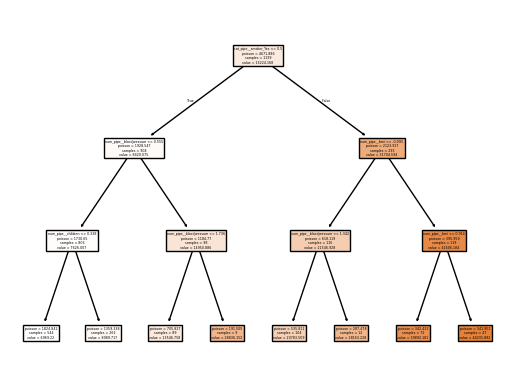

In [93]:
plot_tree(dtr1,feature_names=X_train.columns,filled=True)

[]

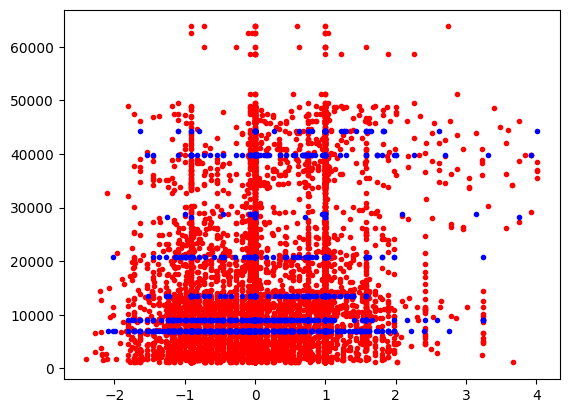

In [103]:
plt.plot(X_train,y_train,'r.')
plt.plot(X_test,dtr1.predict(X_test),'b.')
plt.plot()